In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [8]:
cancer=load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [9]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [11]:
df_feat=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [12]:
from sklearn.model_selection import train_test_split

In [21]:
X=df_feat
y=cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
from sklearn.svm import SVC

In [23]:
s=SVC()

In [24]:
s.fit(X_train,y_train)

SVC()

In [25]:
pred=s.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171

[[ 56  10]
 [  3 102]]


In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,.1,.01,.001,.0001]}

In [30]:
grid=GridSearchCV(SVC(),param_grid,verbose=3)

In [31]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.637, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.637, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.633, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.633, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=0.1, gamma=0.001, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.633, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.633, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.887, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.938, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.963, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.962, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .

[CV] .................... C=100, gamma=0.1, score=0.637, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=0.625, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=0.633, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=0.633, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.637, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.637, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.613, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.2s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [32]:
grid.best_params_

{'C': 1, 'gamma': 0.0001}

In [33]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

In [34]:
grid_pred=grid.predict(X_test)

In [35]:
print(classification_report(y_test,grid_pred))
print(confusion_matrix(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

[[ 59   7]
 [  4 101]]


In [37]:
iris=sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

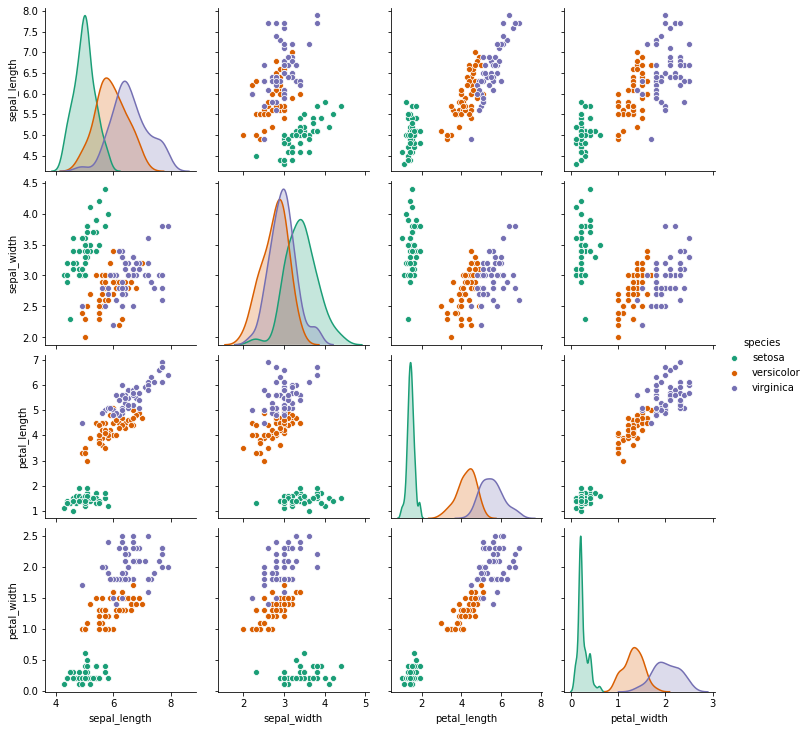

In [41]:
sns.pairplot(iris,hue='species',palette='Dark2')

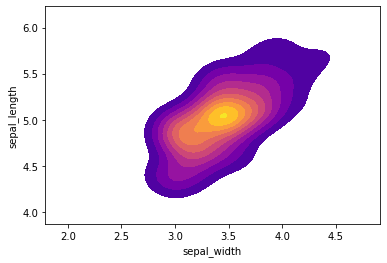

In [49]:
setosa=iris[iris['species']=='setosa']
sns.kdeplot(setosa['sepal_width'],setosa['sepal_length'],cmap='plasma',shade=True,shade_lowest=False)

In [55]:
X=iris.drop('species',axis=1)
y=iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
s1=SVC()

In [57]:
s1.fit(X_train,y_train)

SVC()

In [58]:
pred=s1.predict(X_test)

In [59]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [61]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,.1,.01,.001,.0001]}
grid=GridSearchCV(SVC(),param_grid,verbose=3)

In [62]:
grid.fit(X_test,y_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.556, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.667, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.778, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.667, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.667, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.667, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... C=10, gamma=1, score=1.000, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=1.000, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=1.000, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=1.000, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=1.000, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=1.000, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=1.000, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.5s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [63]:
grid.best_estimator_

SVC(C=1, gamma=1)

In [64]:
grid_pred=grid.predict(X_test)

In [65]:
print(classification_report(y_test,grid_pred))
print(confusion_matrix(y_test,grid_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
